In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ordinaryLeastSquares import ols2D
import ordinaryLeastSquares
import findStat
from matplotlib.tri import Triangulation
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

# Franke Function

In [2]:
def Franke(x1, x2):
    a = 0.75*np.exp(-((9*x1-2)**2)/4-((9*x2-2)**2)/4)
    b = 0.75*np.exp(-((9*x1+1)**2)/49-((9*x2+1)**2)/10)
    c = 0.5*np.exp(-((9*x1-7)**2)/4-((9*x2-3)**2)/4)
    d = 0.2*np.exp(-((9*x1-4)**2)-((9*x2-7)**2))
    return a+b+c-d

# Testing OLS on one set of values generated from noiseless output

In [3]:
n = 100
x1 = np.linspace(0,1,n)
x2 = np.linspace(0,1,n)
xx1, xx2 = np.meshgrid(x1, x2)
xx1 = xx1.reshape((n*n),1)
xx2 = xx2.reshape((n*n),1)
y = Franke(xx1, xx2)
t = ordinaryLeastSquares.ols2D(x1=xx1, x2=xx2, y=y, order=5, test_ratio=0.2)
y_train = t[0]
y_test = t[1]
y_model_train = t[2]
y_model_test = t[3]
trainMSE = findStat.findMSE(y_train, y_model_train)
testMSE = findStat.findMSE(y_test, y_model_test)
trainR2 = findStat.findR2(y_train, y_model_train)
testR2 = findStat.findR2(y_test, y_model_test)

print(trainMSE)
print(testMSE)
print(trainR2)
print(testR2)

0.002104421013410307
0.002059525776181716
0.9744161708984529
0.976303764956395


# Testing OLS on one set of values of noisy data output

In [4]:
y = Franke(xx1, xx2)
y += np.random.normal(0, 0.1, size = y.shape)
t = ordinaryLeastSquares.ols2D(x1=xx1, x2=xx2, y=y, order=5, test_ratio=0.2)
y_train = t[0]
y_test = t[1]
y_model_train = t[2]
y_model_test = t[3]
trainMSE = findStat.findMSE(y_train, y_model_train)
testMSE = findStat.findMSE(y_test, y_model_test)
trainR2 = findStat.findR2(y_train, y_model_train)
testR2 = findStat.findR2(y_test, y_model_test)

print(trainMSE)
print(testMSE)
print(trainR2)
print(testR2)

0.012242285936193852
0.011737443672674252
0.8686493168960805
0.8711863454752181


# Performing OLS for varying model complexity, data size, noise, test ratio
For parameters:

1. polynomial order $p$ is the model complexity. We test our code for 2D polynomials of order $p = 1,2,3,4,5$
2. data size $n$ is the number of points we divide each axis into to find our data. We test for n = 100, 500, 1000, 5000, 10000
3. noise variance $\sigma$ is the variance of the zero mean gaussian noise we add to the output data
4. test ratio $r$ is the ratio with which we partition the data into training and testing set. We use $r = 0.0, 0.1, 0.2, 0.3, 0.4, 0.5$

For each combination of $(p, n, \sigma, r)$ we get output $MSE_train, MSE_test, R2_train, R2_test $

In [5]:
p = np.arange(1,6)
n = np.array([20, 300])#, 1000, 3000])
noise = np.array([0.0, 0.025, 0.05, 0.075, 0.1])
r = np.arange(1,5)*0.1

train_MSE_arr = np.zeros([len(p), len(n), len(noise), len(r)])
test_MSE_arr = np.zeros([len(p), len(n), len(noise), len(r)])
train_R2_arr = np.zeros([len(p), len(n), len(noise), len(r)])
test_R2_arr = np.zeros([len(p), len(n), len(noise), len(r)])

def findmyStats(OLS_out):
    #find stats based on OLS output
    y_train = OLS_out[0]
    y_test = OLS_out[1]
    y_model_train = OLS_out[2]
    y_model_test = OLS_out[3]
    trainMSE = findStat.findMSE(y_train, y_model_train)
    testMSE = findStat.findMSE(y_test, y_model_test)
    trainR2 = findStat.findR2(y_train, y_model_train)
    testR2 = findStat.findR2(y_test, y_model_test)
    
    return trainMSE, testMSE, trainR2, testR2

In [6]:
for i in range(len(p)):
    for j in range(len(n)):
        for k in range(len(noise)):
            for l in range(len(r)):
                x1 = np.linspace(0,1,n[j])
                x2 = np.linspace(0,1,n[j])
                xx1, xx2 = np.meshgrid(x1, x2)
                xx1 = xx1.reshape((n[j]*n[j]),1)
                xx2 = xx2.reshape((n[j]*n[j]),1)
                y = Franke(xx1, xx2)
                y += np.random.normal(0, noise[k], size = y.shape)
                
                t = findmyStats(ordinaryLeastSquares.ols2D(x1=xx1, x2=xx2, y=y, order=p[i], test_ratio=r[l]))
                train_MSE_arr[i,j,k,l] = t[0]
                test_MSE_arr[i,j,k,l] = t[1]
                train_R2_arr[i,j,k,l] = t[2]
                test_R2_arr[i,j,k,l] = t[3]
print(train_MSE_arr)
print(train_MSE_arr[:, 0, : , 0])

[[[[0.02746547 0.02685336 0.02670305 0.02501139]
   [0.02829047 0.02663883 0.03029868 0.02700545]
   [0.03007533 0.02818559 0.0325016  0.03346727]
   [0.03393756 0.03354447 0.03014362 0.02803175]
   [0.0337201  0.03643728 0.03516201 0.03910629]]

  [[0.02588119 0.02597329 0.0259334  0.02609904]
   [0.02650845 0.0265535  0.02644776 0.02662686]
   [0.02848837 0.02832941 0.02821776 0.02830839]
   [0.03174253 0.03139312 0.03146384 0.03188081]
   [0.0359707  0.03584826 0.03602764 0.03583599]]]


 [[[0.01794227 0.0170575  0.01797942 0.01819562]
   [0.01769544 0.01824962 0.0188885  0.01817926]
   [0.02062401 0.02015321 0.01848912 0.02052101]
   [0.02397815 0.02568762 0.01970866 0.02478906]
   [0.02642416 0.03116823 0.02814601 0.02792772]]

  [[0.01710021 0.01709798 0.01714147 0.01701614]
   [0.01774409 0.01775116 0.0177278  0.01762152]
   [0.01956569 0.01959509 0.0196093  0.01955311]
   [0.0227303  0.02293859 0.02266327 0.02276925]
   [0.02703903 0.02724009 0.0271411  0.02717232]]]


 [[[0.00

In [7]:
# Comparison Plots

(-0.02, 0.12000000000000001)

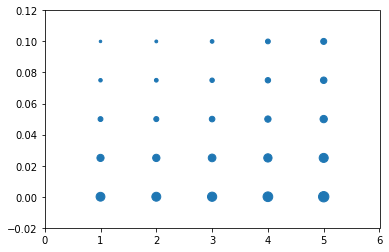

In [8]:
fig, ax = plt.subplots()
pp, nnoise = np.meshgrid(p, noise)
#pp = pp.flatten()
#nnoise = nnoise.flatten()
#pp.shape
#train_MSE_arr[:, 1, : , 1].shape
ax.scatter(pp, nnoise, train_MSE_arr[:, 1, : , 1]*3000)
ax.set_xlim([p[0]-1, p[-1]+1])
ax.set_ylim([noise[0]-0.02, noise[-1]+0.02])

(-0.02, 0.12000000000000001)

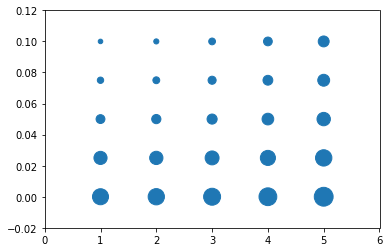

In [9]:
fig, ax = plt.subplots()
pp, nnoise = np.meshgrid(p, noise)
ax.scatter(pp, nnoise, test_MSE_arr[:, 1, : , 1]*10000)
ax.set_xlim([p[0]-1, p[-1]+1])
ax.set_ylim([noise[0]-0.02, noise[-1]+0.02])

Text(0.5, 0, 'polynomial order')

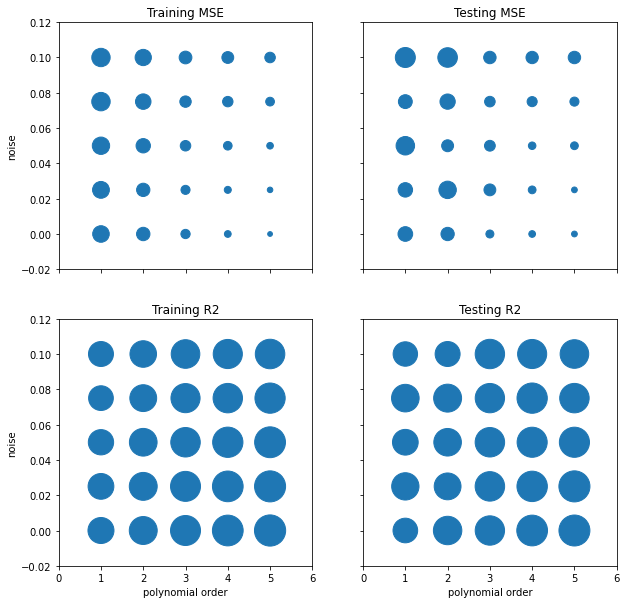

In [10]:
fig, ax = plt.subplots(2,2, figsize = (10,10), sharex=True, sharey=True)
pp, nnoise = np.meshgrid(p, noise)

ax[0, 0].scatter(pp, nnoise, np.transpose(train_MSE_arr[:, 0, : , 0]*10000))
ax[0, 1].scatter(pp, nnoise, np.transpose(test_MSE_arr[:, 0, : , 0]*10000))
ax[1, 0].scatter(pp, nnoise, np.transpose(train_R2_arr[:, 0, : , 0]*1000))
ax[1, 1].scatter(pp, nnoise, np.transpose(test_R2_arr[:, 0, : , 0]*1000))

ax[0,0].set_xlim([p[0]-1, p[-1]+1])
ax[0,0].set_ylim([noise[0]-0.02, noise[-1]+0.02])
ax[0,1].set_xlim([p[0]-1, p[-1]+1])
ax[0,1].set_ylim([noise[0]-0.02, noise[-1]+0.02])
ax[1,0].set_xlim([p[0]-1, p[-1]+1])
ax[1,0].set_ylim([noise[0]-0.02, noise[-1]+0.02])
ax[1,1].set_xlim([p[0]-1, p[-1]+1])
ax[1,1].set_ylim([noise[0]-0.02, noise[-1]+0.02])

ax[0,0].set_title("Training MSE")
ax[0,1].set_title("Testing MSE")
ax[1,0].set_title("Training R2")
ax[1,1].set_title("Testing R2")

ax[0,0].set_ylabel("noise")
ax[1,0].set_ylabel("noise")
ax[1,0].set_xlabel("polynomial order")
ax[1,1].set_xlabel("polynomial order")

ValueError: 'c' argument has 25 elements, which is inconsistent with 'x' and 'y' with size 100.

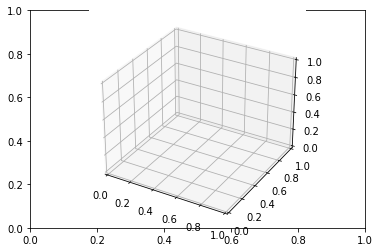

In [11]:
fig, ax = plt.subplots()
ax = plt.axes(projection='3d')
pp, nnoise, rr = np.meshgrid(p, noise, r)
ax.scatter3D(pp, nnoise, rr, c=np.transpose(train_MSE_arr[:, 0, : , 0]*10000))

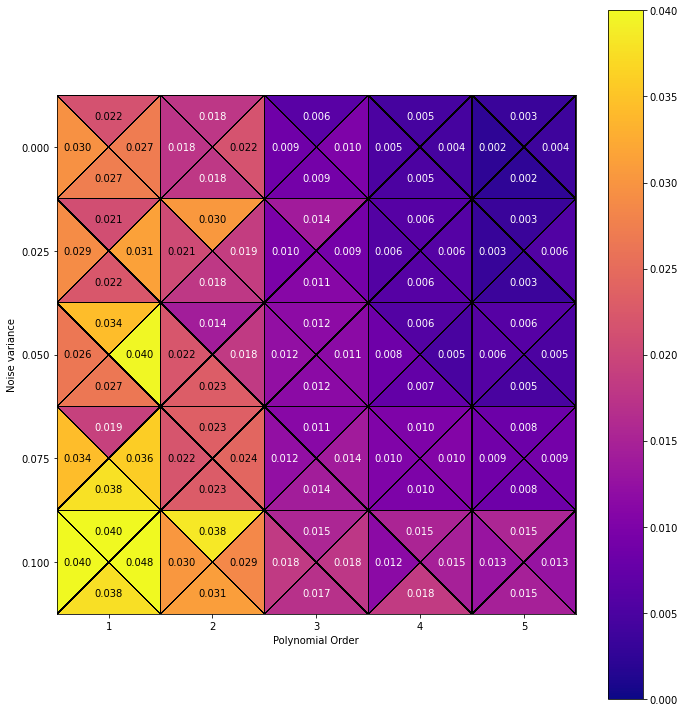

In [26]:
# this plot is based on stackover flow answer by user JohanC to the question in the link 
# https://stackoverflow.com/questions/66048529/how-to-create-a-heatmap-where-each-cell-is-divided-into-4-triangles
def triangulation_for_triheatmap(M, N):
    xv, yv = np.meshgrid(np.arange(-0.5, M), np.arange(-0.5, N))  # vertices of the little squares
    xc, yc = np.meshgrid(np.arange(0, M), np.arange(0, N))  # centers of the little squares
    x = np.concatenate([xv.ravel(), xc.ravel()])
    y = np.concatenate([yv.ravel(), yc.ravel()])
    cstart = (M + 1) * (N + 1)  # indices of the centers

    trianglesN = [(i + j * (M + 1), i + 1 + j * (M + 1), cstart + i + j * M)
                  for j in range(N) for i in range(M)]
    trianglesE = [(i + 1 + j * (M + 1), i + 1 + (j + 1) * (M + 1), cstart + i + j * M)
                  for j in range(N) for i in range(M)]
    trianglesS = [(i + 1 + (j + 1) * (M + 1), i + (j + 1) * (M + 1), cstart + i + j * M)
                  for j in range(N) for i in range(M)]
    trianglesW = [(i + (j + 1) * (M + 1), i + j * (M + 1), cstart + i + j * M)
                  for j in range(N) for i in range(M)]
    return [Triangulation(x, y, triangles) for triangles in [trianglesN, trianglesE, trianglesS, trianglesW]]

values = [np.transpose(test_MSE_arr[:, 0, : , 0]), np.transpose(test_MSE_arr[:, 0, : , 1]),
          np.transpose(test_MSE_arr[:, 0, : , 2]), np.transpose(test_MSE_arr[:, 0, : , 3])]

triangul = triangulation_for_triheatmap(5, 5)
cmaps = ['Blues','Blues','Blues','Blues']#['Blues', 'Greens', 'Purples', 'Reds']  # ['winter', 'spring', 'summer', 'autumn']
norms = [plt.Normalize(-0.5, 1) for _ in range(4)]
fig, ax = plt.subplots(figsize=(10,10))
#imgs = [ax.tripcolor(t, np.ravel(val), cmap=cmap, norm=norm, ec='white')
#        for t, val, cmap, norm in zip(triangul, values*100, cmaps, norms)]
imgs = [ax.tripcolor(t, val.ravel(), cmap='plasma', vmin=0, vmax=0.04, ec='k')
        for t, val in zip(triangul, (values))]
for val, dir in zip(values, [(-1, 0), (0, 1), (1, 0), (0, -1)]):
    for i in range(5):
        for j in range(5):
            v = val[j, i]
            ax.text(i + 0.3 * dir[1], j + 0.3 * dir[0], f'{v:.3f}', color='k' if 0.02 < v < 0.07 else 'w', ha='center', va='center')
ax.set_xticks(range(5))
ax.set_yticks(range(5))

def ymajor_tick(x, pos):
    return f"{x*0.025:.3f}"
def xmajor_tick(x, pos):
    return f"{x+1}"

ax.yaxis.set_major_locator(MultipleLocator(1.000))
# FuncFormatter is created and used automatically
ax.yaxis.set_major_formatter(ymajor_tick)

ax.xaxis.set_major_formatter(xmajor_tick)

ax.invert_yaxis()
ax.margins(x=0, y=0)
ax.set_xlabel("Polynomial Order")
ax.set_ylabel("Noise variance")

ax.set_aspect('equal', 'box')  # square cells
cbar = fig.colorbar(imgs[0], ax=ax)
plt.tight_layout()
plt.show()


